In [1]:
import pandas as pd
import nltk
import numpy as np
data_bef_Aug_2017 = pd.read_csv("Hotel_Reviews.csv")
data_aft_Jul_2018 = pd.read_csv('Britannia International Hotel Canary Wharf.csv')

In [2]:
import string

# Clean up the date in the "Review_date"
data_aft_Jul_2018.Review_date = data_aft_Jul_2018.Review_date.apply(lambda x: x.replace('Reviewed: ',''))
data_aft_Jul_2018.head()

Unnamed: 0     Name         Country                          Room_stayed  \
0           0     Anuj           India  Standard Double Room without Window   
1           1        B  United Kingdom                 Standard Double Room   
2           2      Lex  United Kingdom                 Standard Double Room   
3           3  Rashida  United Kingdom                   Standard Twin Room   
4           4    Floyd  United Kingdom                 Standard Double Room   

                 Date_stayed      Trip_type        Review_date  \
0     1 night ·  August 2020  Solo traveler    August 17, 2020   
1   1 night ·  February 2021         Couple  February 13, 2021   
2  2 nights ·  February 2021  Solo traveler   February 7, 2021   
3    1 night ·  January 2021         Couple   February 1, 2021   
4    1 night ·  January 2021  Solo traveler   January 21, 2021   

              Review_title                                           Positive  \
0              Exceptional             Room quality.. hotel staff.. the bar..   
1                     Good  The bed, size of room, the bath tub feature in...   
2                     Good  I was made very welcome at the britania Hotel ...   
3  It was a pleasant stay.                            Location was brilliant.   
4    My stay was fantastic  Syl checked me in. She was friendly and profes...   

                                            Negative Reviewer_score  
0  There was cig box in the room which i think th...             10  
1  Dirty windows and dead bug found in the bath a...            7.0  
2                                      Not Available            7.0  
3  The first room given was not clean. On notifyi...            7.0  
4                                      Not Available            6.0

In [3]:
data_aft_Jul_2018.describe()

Unnamed: 0
count  14144.000000
mean    7071.500000
std     4083.165439
min        0.000000
25%     3535.750000
50%     7071.500000
75%    10607.250000
max    14143.000000

In [4]:
data_aft_Jul_2018.isnull().sum()

Unnamed: 0           0
Name                 0
Country              0
Room_stayed          0
Date_stayed          0
Trip_type            0
Review_date          0
Review_title         1
Positive             8
Negative          1816
Reviewer_score       0
dtype: int64

In [5]:
data_aft_Jul_2018[data_aft_Jul_2018.Review_date=='Not Available'].index

Int64Index([  545,   582,   736,   743,  1142,  1144,  1963,  2676,  2726,
             2796,  2805,  2826,  2918,  2961,  3146,  3206,  3258,  3330,
             3603,  3710,  3875,  3908,  3972,  4010,  4046,  4082,  4215,
             4239,  4338,  4396,  4627,  4745,  4915,  4935,  5155,  5185,
             5252,  5357,  5399,  5550,  6483,  6742,  6916,  6966,  7439,
             8291, 11853, 12431],
           dtype='int64')

In [6]:
# Where date is not available, use the neighbouring cell's value (likely the review was provided around the same time)
not_avail_index = data_aft_Jul_2018[data_aft_Jul_2018.Review_date=='Not Available'].index
not_avail_index
print(f"Number of Not Available before cleaning: {len(not_avail_index)}")

# Define a function to take "neighbour's" Review Date, since reviews in consecutive rows are typically from reviews of
# the same date or around the same date
def repl_not_avail(own_index):
    data_aft_Jul_2018.loc[own_index, 'Review_date'] = data_aft_Jul_2018.loc[own_index+1, 'Review_date']

for i in not_avail_index:
    repl_not_avail(i)

Number of Not Available before cleaning: 48


In [7]:
# Replaced all 'Not Available' in the Review_date
print(f"Number of Not Available left after cleaning: {len(data_aft_Jul_2018[data_aft_Jul_2018.Review_date=='Not Available'])}")

Number of Not Available left after cleaning: 0


In [8]:
# Test
i = 3
index = not_avail_index[i]
print(data_aft_Jul_2018.loc[index-1, 'Review_date'])
print(f"{(data_aft_Jul_2018.loc[index, 'Review_date'])} <--- previously 'Not Available'")
print(data_aft_Jul_2018.loc[index+1, 'Review_date'])
print()

September 25, 2019
September 24, 2019 <--- previously 'Not Available'
September 24, 2019



In [9]:
from datetime import datetime

def string2date(string):
    return pd.to_datetime(datetime.strptime(string, '%B %d, %Y'))

data_aft_Jul_2018.Review_date = data_aft_Jul_2018.Review_date.apply(string2date)

In [10]:
data_aft_Jul_2018.head()

Unnamed: 0     Name         Country                          Room_stayed  \
0           0     Anuj           India  Standard Double Room without Window   
1           1        B  United Kingdom                 Standard Double Room   
2           2      Lex  United Kingdom                 Standard Double Room   
3           3  Rashida  United Kingdom                   Standard Twin Room   
4           4    Floyd  United Kingdom                 Standard Double Room   

                 Date_stayed      Trip_type Review_date  \
0     1 night ·  August 2020  Solo traveler  2020-08-17   
1   1 night ·  February 2021         Couple  2021-02-13   
2  2 nights ·  February 2021  Solo traveler  2021-02-07   
3    1 night ·  January 2021         Couple  2021-02-01   
4    1 night ·  January 2021  Solo traveler  2021-01-21   

              Review_title                                           Positive  \
0              Exceptional             Room quality.. hotel staff.. the bar..   
1                     Good  The bed, size of room, the bath tub feature in...   
2                     Good  I was made very welcome at the britania Hotel ...   
3  It was a pleasant stay.                            Location was brilliant.   
4    My stay was fantastic  Syl checked me in. She was friendly and profes...   

                                            Negative Reviewer_score  
0  There was cig box in the room which i think th...             10  
1  Dirty windows and dead bug found in the bath a...            7.0  
2                                      Not Available            7.0  
3  The first room given was not clean. On notifyi...            7.0  
4                                      Not Available            6.0

Cleaning the scraped dataset

In [11]:
later_data_original = data_aft_Jul_2018[['Review_date', 'Country', 'Positive', 'Negative', 'Trip_type']].copy()

later_data_original['Year'] = later_data_original['Review_date'].dt.year
later_data_original.head()

Review_date         Country  \
0  2020-08-17           India   
1  2021-02-13  United Kingdom   
2  2021-02-07  United Kingdom   
3  2021-02-01  United Kingdom   
4  2021-01-21  United Kingdom   

                                            Positive  \
0             Room quality.. hotel staff.. the bar..   
1  The bed, size of room, the bath tub feature in...   
2  I was made very welcome at the britania Hotel ...   
3                            Location was brilliant.   
4  Syl checked me in. She was friendly and profes...   

                                            Negative      Trip_type  Year  
0  There was cig box in the room which i think th...  Solo traveler  2020  
1  Dirty windows and dead bug found in the bath a...         Couple  2021  
2                                      Not Available  Solo traveler  2021  
3  The first room given was not clean. On notifyi...         Couple  2021  
4                                      Not Available  Solo traveler  2021

In [12]:
corrected_headers_dict = {
    'Review_date' : 'Review_Date',
    'Country' : 'Reviewer_Nationality',
    'Positive' : 'Positive_Review',
    'Negative' : 'Negative_Review',
    'Trip_type' : 'Guest_type'
}

later_data_original.rename(columns=corrected_headers_dict, inplace=True)
later_data_original.head()

Review_Date Reviewer_Nationality  \
0  2020-08-17                India   
1  2021-02-13       United Kingdom   
2  2021-02-07       United Kingdom   
3  2021-02-01       United Kingdom   
4  2021-01-21       United Kingdom   

                                     Positive_Review  \
0             Room quality.. hotel staff.. the bar..   
1  The bed, size of room, the bath tub feature in...   
2  I was made very welcome at the britania Hotel ...   
3                            Location was brilliant.   
4  Syl checked me in. She was friendly and profes...   

                                     Negative_Review     Guest_type  Year  
0  There was cig box in the room which i think th...  Solo traveler  2020  
1  Dirty windows and dead bug found in the bath a...         Couple  2021  
2                                      Not Available  Solo traveler  2021  
3  The first room given was not clean. On notifyi...         Couple  2021  
4                                      Not Available  Solo traveler  2021

In [13]:
later_data_original.Guest_type.value_counts()

Couple           4713
Solo traveler    3983
Group            2078
Not Available    1963
Family           1407
Name: Guest_type, dtype: int64

Filter out our chosen hotel's reviews from the Kaggle dataset

In [14]:
hotel_brit = data_bef_Aug_2017[data_bef_Aug_2017.Hotel_Name == 'Britannia International Hotel Canary Wharf']
hotel_brit.reset_index(inplace = True, drop = True)
hotel_brit = hotel_brit[['Review_Date', 'Reviewer_Nationality', 'Positive_Review', 'Negative_Review', 'Tags']].copy()
hotel_brit.Review_Date = pd.to_datetime(hotel_brit.Review_Date)

hotel_brit['Year'] = hotel_brit['Review_Date'].dt.year

hotel_brit.head()

Review_Date Reviewer_Nationality  \
0  2017-08-03      United Kingdom    
1  2017-08-03      United Kingdom    
2  2017-08-02      United Kingdom    
3  2017-08-02      United Kingdom    
4  2017-08-02      United Kingdom    

                                     Positive_Review  \
0   The location was excellent for getting to the O2   
1   The house keeping lady made my boyfriends day...   
2                                        No Positive   
3                                    The bed was OK    
4   The Receptionists and Cleaners are very polit...   

                                     Negative_Review  \
0   The car park was small and unpleasant People ...   
1   We weren t told that the only spa facility op...   
2   I asked how far the O2 was and got told a 7 m...   
3   Hot stuffy room air con not working properly ...   
4   Although the price seems like it is cheap you...   

                                                Tags  Year  
0  [' Leisure trip ', ' Group ', ' Standard Doubl...  2017  
1  [' Leisure trip ', ' Couple ', ' Standard Doub...  2017  
2  [' Leisure trip ', ' Solo traveler ', ' Standa...  2017  
3  [' Couple ', ' Standard Twin Room ', ' Stayed ...  2017  
4  [' Leisure trip ', ' Family with young childre...  2017

In [15]:
import ast
hotel_brit['Travel_type'] = hotel_brit.Tags.apply(lambda x: ast.literal_eval(x)[0])
hotel_brit['Guest_type'] = hotel_brit.Tags.apply(lambda x: ast.literal_eval(x)[1] if len(ast.literal_eval(x)) > 1 else None)
hotel_brit['Room_type'] = hotel_brit.Tags.apply(lambda x: ast.literal_eval(x)[2] if len(ast.literal_eval(x)) > 2 else None)
hotel_brit['Stay'] = hotel_brit.Tags.apply(lambda x: ast.literal_eval(x)[3] if len(ast.literal_eval(x)) > 3 else None)
hotel_brit.head()

Review_Date Reviewer_Nationality  \
0  2017-08-03      United Kingdom    
1  2017-08-03      United Kingdom    
2  2017-08-02      United Kingdom    
3  2017-08-02      United Kingdom    
4  2017-08-02      United Kingdom    

                                     Positive_Review  \
0   The location was excellent for getting to the O2   
1   The house keeping lady made my boyfriends day...   
2                                        No Positive   
3                                    The bed was OK    
4   The Receptionists and Cleaners are very polit...   

                                     Negative_Review  \
0   The car park was small and unpleasant People ...   
1   We weren t told that the only spa facility op...   
2   I asked how far the O2 was and got told a 7 m...   
3   Hot stuffy room air con not working properly ...   
4   Although the price seems like it is cheap you...   

                                                Tags  Year     Travel_type  \
0  [' Leisure trip ', ' Group ', ' Standard Doubl...  2017   Leisure trip    
1  [' Leisure trip ', ' Couple ', ' Standard Doub...  2017   Leisure trip    
2  [' Leisure trip ', ' Solo traveler ', ' Standa...  2017   Leisure trip    
3  [' Couple ', ' Standard Twin Room ', ' Stayed ...  2017         Couple    
4  [' Leisure trip ', ' Family with young childre...  2017   Leisure trip    

                     Guest_type                              Room_type  \
0                        Group                   Standard Double Room    
1                       Couple    Standard Double Room without Window    
2                Solo traveler    Standard Double Room without Window    
3           Standard Twin Room                         Stayed 1 night    
4   Family with young children    Standard Double Room without Window    

                Stay  
0    Stayed 1 night   
1    Stayed 1 night   
2    Stayed 1 night   
3               None  
4   Stayed 4 nights

Merging the Booking.com data and our own-scraped data

In [16]:
full_df_brit = pd.concat([hotel_brit, later_data_original], axis=0, sort=False, ignore_index=True)
full_df_brit.head()

Review_Date Reviewer_Nationality  \
0  2017-08-03      United Kingdom    
1  2017-08-03      United Kingdom    
2  2017-08-02      United Kingdom    
3  2017-08-02      United Kingdom    
4  2017-08-02      United Kingdom    

                                     Positive_Review  \
0   The location was excellent for getting to the O2   
1   The house keeping lady made my boyfriends day...   
2                                        No Positive   
3                                    The bed was OK    
4   The Receptionists and Cleaners are very polit...   

                                     Negative_Review  \
0   The car park was small and unpleasant People ...   
1   We weren t told that the only spa facility op...   
2   I asked how far the O2 was and got told a 7 m...   
3   Hot stuffy room air con not working properly ...   
4   Although the price seems like it is cheap you...   

                                                Tags  Year     Travel_type  \
0  [' Leisure trip ', ' Group ', ' Standard Doubl...  2017   Leisure trip    
1  [' Leisure trip ', ' Couple ', ' Standard Doub...  2017   Leisure trip    
2  [' Leisure trip ', ' Solo traveler ', ' Standa...  2017   Leisure trip    
3  [' Couple ', ' Standard Twin Room ', ' Stayed ...  2017         Couple    
4  [' Leisure trip ', ' Family with young childre...  2017   Leisure trip    

                     Guest_type                              Room_type  \
0                        Group                   Standard Double Room    
1                       Couple    Standard Double Room without Window    
2                Solo traveler    Standard Double Room without Window    
3           Standard Twin Room                         Stayed 1 night    
4   Family with young children    Standard Double Room without Window    

                Stay  
0    Stayed 1 night   
1    Stayed 1 night   
2    Stayed 1 night   
3               None  
4   Stayed 4 nights

Check that our own scraped data (i.e. after year 2017) has been merged into the dataframe

In [17]:
full_df_brit[full_df_brit.Review_Date>'2019-08-01']

Review_Date Reviewer_Nationality  \
4789   2020-08-17                India   
4790   2021-02-13       United Kingdom   
4791   2021-02-07       United Kingdom   
4792   2021-02-01       United Kingdom   
4793   2021-01-21       United Kingdom   
...           ...                  ...   
18883  2019-09-13               Israel   
18884  2019-09-10       United Kingdom   
18885  2019-09-02               Poland   
18886  2019-09-01                Spain   
18887  2019-08-19       United Kingdom   

                                         Positive_Review  \
4789              Room quality.. hotel staff.. the bar..   
4790   The bed, size of room, the bath tub feature in...   
4791   I was made very welcome at the britania Hotel ...   
4792                             Location was brilliant.   
4793   Syl checked me in. She was friendly and profes...   
...                                                  ...   
18883    There are no comments available for this review   
18884    There are no comments available for this review   
18885    There are no comments available for this review   
18886    There are no comments available for this review   
18887    There are no comments available for this review   

                                         Negative_Review Tags  Year  \
4789   There was cig box in the room which i think th...  NaN  2020   
4790   Dirty windows and dead bug found in the bath a...  NaN  2021   
4791                                       Not Available  NaN  2021   
4792   The first room given was not clean. On notifyi...  NaN  2021   
4793                                       Not Available  NaN  2021   
...                                                  ...  ...   ...   
18883                                      Not Available  NaN  2019   
18884                                      Not Available  NaN  2019   
18885                                      Not Available  NaN  2019   
18886                                      Not Available  NaN  2019   
18887                                      Not Available  NaN  2019   

      Travel_type     Guest_type Room_type Stay  
4789          NaN  Solo traveler       NaN  NaN  
4790          NaN         Couple       NaN  NaN  
4791          NaN  Solo traveler       NaN  NaN  
4792          NaN         Couple       NaN  NaN  
4793          NaN  Solo traveler       NaN  NaN  
...           ...            ...       ...  ...  
18883         NaN  Not Available       NaN  NaN  
18884         NaN  Not Available       NaN  NaN  
18885         NaN  Not Available       NaN  NaN  
18886         NaN  Not Available       NaN  NaN  
18887         NaN  Not Available       NaN  NaN  

[6230 rows x 10 columns]

In [18]:
# We know that we lack data between some time in mid-2017 and mid-2018; we write the following codes to find out the
# exact dates of data gap

data_pre_2018 = full_df_brit[full_df_brit['Review_Date']<'2018-01-01']
print(f"Last day of avail data in 2017: \t{np.max(data_pre_2018['Review_Date'])}")

data_post_2018 = full_df_brit[full_df_brit['Review_Date']>='2018-01-01']
print(f"First day of avail data in 2018: \t{np.min(data_post_2018['Review_Date'])}")

Last day of avail data in 2017: 	2017-08-03 00:00:00
First day of avail data in 2018: 	2018-07-31 00:00:00


In [19]:
# We also get the date range of our dataset

print(f"First day of dataset: \t{np.min(full_df_brit['Review_Date'])}")
print(f"Last day of dataset: \t{np.max(full_df_brit['Review_Date'])}")
# We will not use data from 2021 because of the small sample size from 2021

First day of dataset: 	2015-08-04 00:00:00
Last day of dataset: 	2021-02-13 00:00:00


After preparing the dataset, it's time to clean the reviews.

In [20]:
hotel = full_df_brit.copy()

In [21]:
hotel.isnull().sum()
# There are some null values in the Positive and Negative Reviews; we need to treat them.
# We insert a single letter word to replace those null values so that our codes can run. In the cleaning process, 
# they will be ignored as we'll be filtering out single-letter reviews.

Review_Date                 0
Reviewer_Nationality        0
Positive_Review             8
Negative_Review          1816
Tags                    14144
Year                        0
Travel_type             14144
Guest_type                  0
Room_type               14145
Stay                    14235
dtype: int64

In [22]:
hotel.Positive_Review.fillna('N', inplace=True)

In [23]:
hotel.Positive_Review.value_counts()
# We can see that there are some words that are not really review and may skew our analyses. We clean them by
# replacing them with single letter values which will be cleaned away during our text pre-processing later. They are:
## There are no comments available for this review  
## This review is hidden because it doesn't meet our guidelines. 

There are no comments available for this review                                                                                                  5367
No Positive                                                                                                                                       690
Location                                                                                                                                          266
Nothing                                                                                                                                           160
 Location                                                                                                                                         148
                                                                                                                                                 ... 
Staff ok but manager was a total disgrace. I have never been so insulted in my life.mire to the poin

In [24]:
positive_rev_replace = {
    'There are no comments available for this review' : 'N',
    "This review is hidden because it doesn't meet our guidelines." : "N"    
}

hotel.Positive_Review.replace(to_replace=positive_rev_replace, inplace=True)
hotel.Positive_Review.value_counts()

N                                                                                                                                                5423
No Positive                                                                                                                                       690
Location                                                                                                                                          266
Nothing                                                                                                                                           160
 Location                                                                                                                                         148
                                                                                                                                                 ... 
Staff ok but manager was a total disgrace. I have never been so insulted in my life.mire to the poin

Now, on to cleaning the Negative Reviews

In [25]:
hotel.Negative_Review.isnull().sum()

1816

In [26]:
hotel.Negative_Review.fillna('N', inplace=True)
hotel.Negative_Review.isnull().sum()

0

In [27]:
for item in hotel.Negative_Review.value_counts().index:
    print(item)

# Again, we need to pick out those that may skew our analyses. They are:
## Not Available
## N/a
##  N A
## Na
## 
## -
## Na
## .
##  N a
##  n a
##  Na
## ....

Not Available
N
No Negative
Nothing
 Nothing
Everything
 Everything
N/a
 Nothing 
None
Nothing.
 N A
 None
nothing
everything
 As above
 Staff
 Breakfast
No free wifi
Every thing
Nothing to dislike
Ok
 nothing
Breakfast
 No free wifi
 Decor
 N a
Wifi
All good
 See above
No wifi
 Location
 
 No complaints
.
 No
Na
-
Nothing really
 Nothing at all 
 The location
location
 The staff
All flawless
 nothing 
Nothing everything was perfect
 Hard bed
Not very clean
Cleanliness
Dated
No WiFi in rooms
 no free wifi
Beds not very comfortable
 Paying for wifi
....
Mattress
See above.
Everything else
 No complaints 
 Nothing everything was fine
No windows
 Coffee
Bed
 n a
As above
See above
 Non
As above.
 NOTHING
A little tired
Great location
More staff on reception
 Bed was uncomfortable
Internet
 Paid wifi
 Not applicable
Old and tired
A bit dated
 Na
Dirty windows
 Dated
Location
 Needs a little updating
Not clean
Food
Perfect
The bed
Decor a bit tired
Car park
 The decor is very tired wallpape

 All is very formal no proper place to eat as posted located in not very pleasant area with traffic not many smiles from staff as expected 
 I was given a room with no window Dump 
Very difficult check in and bit difficult check out. Check took nearly an hour, there were only 2 customers in front of us , still took very long time 
Similarly check out also took some time because I had a deposit and needed refund
The pillow is very small. The internet was just 20 minutes in the room while the lobby was 24/h. That isn't fair.
Breakfast only . Pisa was not very good either .
 Although described as a twin room it was two small prob 2 6 single beds pushed together
Food and furniture
Reception staff were disinterested, unhelpful and lacking in warmth (with the exception of one person on night duty). Very poor. WiFi only available in the foyer.
The walk from DLR to the hotel
 Nothing it was great 
 staff not friendly
Check in staff could have been abit nicer
 Internet
 Hotel dining extremely l

 The hotel is in urgent need of renovation it is very old and tired and apart from the grand entrance everything else is old The cleanliness was an issue as the suite was dusty and mould on the taps Breakfast was a disaster as the quality of food was terrible Watered down juices and rubbish coffee from a pot on the table which was dirty 
No free parking prices to expensive and no free internet I’ve never had to pay for internet in other hotel 😟😟😟😟😟😟😟😟😟
 The fitness place was not worth 4 very dirty pool
Toilet paper wasn't given twice when we had the room serviced on the second day.
No comments
no wifi!!!
Long corridor walk to room!
Staff very rude, very poor English, we asked to book in at 1pm before hand then when we arrived told we must pay to upgrade the room
 Some furniture are little bit old and broken 
 Room cleaness food 
 The hotel now charges for wifi in the room which they never used to so slightly disappointed about that 
 Rooms have a very worn shabby feel and toiletry and 

 No hot water Had to move room four times Was allocated a room that had already been allocated to another traveller who hammered on my door and was cross that I was in his room Was offered a meal via room service I thought this was compensation but then was made to pay 16 for a very bad pizza
Very dated in all places, my room looked clean but I noticed a lot of dust especially around my beds head board! White marks along the cupboards otherwise very nice.
 room was old and tired furniture was old and scruffy power points limited access bathroom very dated lack of facilities e g no fridge in room after all your rate is 4 star staff not knowledgeable did not know what time breakfast was served breakfast staff poor we had to ask for tea table to be cleaned it was dirty bar tariff differed on way out served by a different person on return same drinks cheaper all in all not a place we will hurry back to 
Even though the hotel advertises offering free wifi, that was not the whole truth. The 

The breakfast and Dinner was terrible. Cold and flavourless especially for the price. TV guide on the remote control did not work. Sheets were not changed for 3 days. Brought two glasses to the room from the bar on the 1st night of our stay and they stayed in the room for the 3 days almost as if the cleaners refused to remove them despite being empty which is not the point. The manager is very nice tho I just feel he is having to pick up the pieces of a very dated hotel which has the potential to be superb.
 Tatty tired and outdated decor furniture that needs a serious refresh Other than when checking in we did not receive a single smile or piece of friendly service from any of the primarily Eastern European staff members The breakfast was appalling so don t waste even more money on that We won t be staying there again 
 I stayed in room 125 and there is no window I wasn t told that I had to book a room with a window 
Outdated.
 charging extra for gym and pool use when staying at the h

The recepcionist, Georgia, she told me in a very bad way that the only room available for me was interior (no windows), twin bed and fully adapted for disabled people (mirrors where not at my level).
 breakfast was bad
Arrangements re Wi-Fi
Some areas quite shabby...gaffer tape on leather look sofas look very tacky
The Friday bar is a bit soulless
Bed was very uncomfortable!
drilling work and no wifi in room (only 20 mints allowed in 24 hours)
Was advised at check in had an upgrade 
Upon entering the room the curtains were drawn 
Opening them I was greeted by the air conditioning units and associated metal work.
Would have liked to have known what I was upgraded from
 Hotel staff was not cooperating at all Beds were separated Spring Mattress were paining in back like hell Bathroom sinks were choked Had to brush in Bath tubs Cleaning staff was pathetic Swimming pool was chargeable Internet wi fi was free for a whole 20 minute session in whole day and that too in hotel lobby and not in r

The rather dowdy and downmarket appearance of the room - not bright and cheerful like even (say) Premier Inn.
Limited room WiFi, expensive WiFi vouchers, slow lifts
 Bettw sche roch unangenehm
Watch out with breakfast coffee, comes out quicker than drinking it. 
Breakfast isn’t value for the money but it does the job. Don’t have high expectations. 
The rooms are like your grandmothers house, cosy but old.
 Bed was awful
No complaints about our stay. There are building works taking place in the hotel which didn’t affect our stay however some parking bays are being used to store materials which will reduce parking at busy times
 It s in need of a good make over its looking very tired and dirty in places
 Drawers were broken bath shower was not working only hot water
Really outdated property with really dirty carpets, stained walls.
Generous room sizes to be let down by horrible thin and old mattresses.
We had a request accepted on reservation and were told on check in that we would be ch

 Dont like breakfast 
Staff support
Windows don't open or close without a socket set (special key) so have to contact reception if you want the window opening/closing. Shower had no pressure, room very tired, they will say it is undergoing refurbishment but it has been sometime since it was last done so overdue. Staff very abrupt on reception, she didn't even ask if I had enjoyed my stay so just left without saying anything.
 The drivers arranged by the hotel were rushed and often distracted with their phones or hand free head sets which created a few close encounters with other unruly drivers on the road This was a little disappointing given the professionalism and efficiency of the hotel staff 
Very tired hotel.
The property was not managed very well. The washroom in my room was not cleaned before I arrived.
 carpets in corridors very tired
Booked an ‘executive twin room’. Tried to put us in a double room first off. The room was dirty, very worn but had a great view. Beware the bats 

In [28]:
negative_rev_replace = {
    'Not Available' : 'N',
    "N/a" : "N",
    " N A" : "N",
    "Na" : "N",
    " N a" : "N",
    " n a" : "N", 
    " Na" : "N",
    "...." : "N"    
}

hotel.Negative_Review.replace(to_replace=negative_rev_replace, inplace=True)
hotel.Negative_Review.value_counts()

N                                                                                                                                                                                                                  8919
No Negative                                                                                                                                                                                                         527
Nothing                                                                                                                                                                                                             111
 Nothing                                                                                                                                                                                                             70
Everything                                                                                                                              

In [29]:
hotel.isnull().sum()
# All nulls for the reviews have been treated. Now we can build WordCloud.

Review_Date                 0
Reviewer_Nationality        0
Positive_Review             0
Negative_Review             0
Tags                    14144
Year                        0
Travel_type             14144
Guest_type                  0
Room_type               14145
Stay                    14235
dtype: int64

Now, we use this notebook to generate WordClouds for just the Britannia Hotel. We use separate notebooks to generate WordClouds for the other 2 competitor hotels.

Transform reviews into corpus

In [30]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
stop_english = stopwords.words('english')
hotel['clean_positive_review'] = hotel['Positive_Review'].apply(lambda x: list(x.split(' ')))
# Remove stop words and single character
hotel['clean_positive_review'] = hotel['clean_positive_review'].apply(lambda x: [w.lower() for w in x if w.lower() not in stop_english and len(w) >=2])
# positive_review Normalization: [am, is, are] -> be
hotel['stemed_clean_positive_review'] = hotel['clean_positive_review'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
# Only stop word removal
final_corpus_positive = hotel['clean_positive_review'].tolist()
# Stop word removal and words stem
stemed_final_corpus_positive = hotel['stemed_clean_positive_review'].tolist()

In [31]:
stemed_final_corpus_positive

[['location', 'excellent', 'getting', 'o2'],
 ['house', 'keeping', 'lady', 'made', 'boyfriend', 'day', 'funny'],
 ['positive'],
 ['bed', 'ok'],
 ['receptionist',
  'cleaner',
  'polite',
  'friendly',
  'hard',
  'working',
  'staff',
  'enjoyed',
  'stay',
  'would',
  'come',
  'room',
  'clean',
  'enough',
  'amenity',
  'one',
  'could',
  'request',
  'anytime',
  'without',
  'problem'],
 ['daughter',
  'upgraded',
  'free',
  'charge',
  'executive',
  'room',
  'balcony',
  'water',
  'enjoyed',
  'quality',
  'price',
  'spice',
  'restaurant',
  'delighted',
  'find',
  'porridge',
  'breakfast',
  'jenny',
  'restaurant',
  'electric',
  'fan',
  'welcome',
  'addition',
  'room'],
 ['could',
  'control',
  'room',
  'temperature',
  'ac',
  'quite',
  'easily',
  'short',
  'walk',
  'tube',
  'station',
  'although',
  'construction',
  'closed',
  'many',
  'path'],
 ['staff', 'friendly', 'location', 'good'],
 ['bed',
  'nice',
  'could',
  'smoke',
  'room',
  'bouns',


In [32]:
hotel['clean_negative_review'] = hotel['Negative_Review'].apply(lambda x: list(x.split(' ')))
# Remove stop words and single character
hotel['clean_negative_review'] = hotel['clean_negative_review'].apply(lambda x: [w.lower() for w in x if w.lower() not in stop_english and len(w) >=2])
# negative_review Normalization: [am, is, are] -> be
hotel['stemed_clean_negative_review'] = hotel['clean_negative_review'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
# Only stop word removal
final_corpus_negative = hotel['clean_negative_review'].tolist()
# Stop word removal and words stem
stemed_final_corpus_negative = hotel['stemed_clean_negative_review'].tolist()

In [33]:
hotel.head(5)

Review_Date Reviewer_Nationality  \
0  2017-08-03      United Kingdom    
1  2017-08-03      United Kingdom    
2  2017-08-02      United Kingdom    
3  2017-08-02      United Kingdom    
4  2017-08-02      United Kingdom    

                                     Positive_Review  \
0   The location was excellent for getting to the O2   
1   The house keeping lady made my boyfriends day...   
2                                        No Positive   
3                                    The bed was OK    
4   The Receptionists and Cleaners are very polit...   

                                     Negative_Review  \
0   The car park was small and unpleasant People ...   
1   We weren t told that the only spa facility op...   
2   I asked how far the O2 was and got told a 7 m...   
3   Hot stuffy room air con not working properly ...   
4   Although the price seems like it is cheap you...   

                                                Tags  Year     Travel_type  \
0  [' Leisure trip ', ' Group ', ' Standard Doubl...  2017   Leisure trip    
1  [' Leisure trip ', ' Couple ', ' Standard Doub...  2017   Leisure trip    
2  [' Leisure trip ', ' Solo traveler ', ' Standa...  2017   Leisure trip    
3  [' Couple ', ' Standard Twin Room ', ' Stayed ...  2017         Couple    
4  [' Leisure trip ', ' Family with young childre...  2017   Leisure trip    

                     Guest_type                              Room_type  \
0                        Group                   Standard Double Room    
1                       Couple    Standard Double Room without Window    
2                Solo traveler    Standard Double Room without Window    
3           Standard Twin Room                         Stayed 1 night    
4   Family with young children    Standard Double Room without Window    

                Stay                              clean_positive_review  \
0    Stayed 1 night                  [location, excellent, getting, o2]   
1    Stayed 1 night   [house, keeping, lady, made, boyfriends, day, ...   
2    Stayed 1 night                                          [positive]   
3               None                                          [bed, ok]   
4   Stayed 4 nights   [receptionists, cleaners, polite, friendly, ha...   

                        stemed_clean_positive_review  \
0                 [location, excellent, getting, o2]   
1  [house, keeping, lady, made, boyfriend, day, f...   
2                                         [positive]   
3                                          [bed, ok]   
4  [receptionist, cleaner, polite, friendly, hard...   

                               clean_negative_review  \
0  [car, park, small, unpleasant, people, mercede...   
1  [told, spa, facility, open, pool, sauna, alrea...   
2  [asked, far, o2, got, told, minute, walk, way,...   
3  [hot, stuffy, room, air, con, working, properl...   
4  [although, price, seems, like, cheap, pay, ext...   

                        stemed_clean_negative_review  
0  [car, park, small, unpleasant, people, mercede...  
1  [told, spa, facility, open, pool, sauna, alrea...  
2  [asked, far, o2, got, told, minute, walk, way,...  
3  [hot, stuffy, room, air, con, working, properl...  
4  [although, price, seems, like, cheap, pay, ext...

In [34]:
hotel.Year.value_counts()

2019    8620
2018    3231
2016    2224
2020    2219
2017    1519
2015    1046
2021      74
Name: Year, dtype: int64

In [35]:
hotel.Reviewer_Nationality.value_counts()
#Majority of guests are from the UK. 

# We also have to treat "United Kingdom" and " United Kingdom" by merging them.

United Kingdom      8620
 United Kingdom     3833
Italy                568
France               460
Germany              408
                    ... 
Zambia                 1
Georgia                1
Guadeloupe             1
 Algeria               1
San Marino             1
Name: Reviewer_Nationality, Length: 231, dtype: int64

In [36]:
nationality_replace = {
    " United Kingdom " : "United Kingdom"
}

hotel.Reviewer_Nationality.replace(to_replace=nationality_replace, inplace=True)
hotel.Reviewer_Nationality.value_counts()

United Kingdom    12453
Italy               568
France              460
Germany             408
Spain               381
                  ...  
San Marino            1
 Uruguay              1
Reunion               1
Zambia                1
 Serbia               1
Name: Reviewer_Nationality, Length: 230, dtype: int64

In [37]:
hotel

Review_Date Reviewer_Nationality  \
0      2017-08-03       United Kingdom   
1      2017-08-03       United Kingdom   
2      2017-08-02       United Kingdom   
3      2017-08-02       United Kingdom   
4      2017-08-02       United Kingdom   
...           ...                  ...   
18928  2018-09-25               Russia   
18929  2018-09-15                Italy   
18930  2018-08-30              Germany   
18931  2018-08-28       United Kingdom   
18932  2018-08-20               France   

                                         Positive_Review  \
0       The location was excellent for getting to the O2   
1       The house keeping lady made my boyfriends day...   
2                                            No Positive   
3                                        The bed was OK    
4       The Receptionists and Cleaners are very polit...   
...                                                  ...   
18928                                                  N   
18929                                                  N   
18930                                                  N   
18931                                                  N   
18932                                                  N   

                                         Negative_Review  \
0       The car park was small and unpleasant People ...   
1       We weren t told that the only spa facility op...   
2       I asked how far the O2 was and got told a 7 m...   
3       Hot stuffy room air con not working properly ...   
4       Although the price seems like it is cheap you...   
...                                                  ...   
18928                                                  N   
18929                                                  N   
18930                                                  N   
18931                                                  N   
18932                                                  N   

                                                    Tags  Year  \
0      [' Leisure trip ', ' Group ', ' Standard Doubl...  2017   
1      [' Leisure trip ', ' Couple ', ' Standard Doub...  2017   
2      [' Leisure trip ', ' Solo traveler ', ' Standa...  2017   
3      [' Couple ', ' Standard Twin Room ', ' Stayed ...  2017   
4      [' Leisure trip ', ' Family with young childre...  2017   
...                                                  ...   ...   
18928                                                NaN  2018   
18929                                                NaN  2018   
18930                                                NaN  2018   
18931                                                NaN  2018   
18932                                                NaN  2018   

          Travel_type                    Guest_type  \
0       Leisure trip                         Group    
1       Leisure trip                        Couple    
2       Leisure trip                 Solo traveler    
3             Couple            Standard Twin Room    
4       Leisure trip    Family with young children    
...               ...                           ...   
18928             NaN                 Not Available   
18929             NaN                 Not Available   
18930             NaN                 Not Available   
18931             NaN                 Not Available   
18932             NaN                 Not Available   

                                   Room_type               Stay  \
0                      Standard Double Room     Stayed 1 night    
1       Standard Double Room without Window     Stayed 1 night    
2       Standard Double Room without Window     Stayed 1 night    
3                            Stayed 1 night                None   
4       Standard Double Room without Window    Stayed 4 nights    
...                                      ...                ...   
18928                                    NaN                NaN   
18929                                    NaN                NaN   
18

Wordcloud function

In [41]:
# Import the wordcloud library
import wordcloud
from collections import Counter

def wc(tive, column = None, value = None):
    if column == None and value == None:
        data = hotel.copy()       
    else:
        data = hotel[hotel[column] == value]
    corpus = data['stemed_clean_' + tive + '_review'].tolist()
    N_top = 5
    # store the high frequent words 
    top_nwords = []
    # check each report 
    for final_doc in corpus:
        c_doc = Counter(final_doc)
        # obtain top N_top words
        top_words = c_doc.most_common(N_top)
        # the first element in tuple is the word
        t_nwords = [w[0] for w in top_words]
        # concatenate the list, e.g., [a,b,c] + [d,a] = [a,b,c,d,a]
        top_nwords = top_nwords + t_nwords
    
    # Join the different processed titles together.
    long_string = " ".join(top_nwords)

    # Create a WordCloud object
    wcloud = wordcloud.WordCloud(background_color='white', width=800, height=400)

    # Generate a word cloud
    wcloud.generate(long_string)

    # Visualize the word cloud
    return wcloud.to_image()

We can use the above function to draw a word cloud with the following arguments (positive or negative review,column to filter,filter value). Examples below:

# Wordcloud with parts of speech (N,V, ADJ...) separated and could ignore words if required

In [42]:
tagged_final_corpus_positive = [nltk.pos_tag(i, tagset = 'universal') for i in final_corpus_positive]
tagged_final_corpus_negative = [nltk.pos_tag(i, tagset = 'universal') for i in final_corpus_negative]

In [43]:
tagged_final_corpus_positive[0:5]

[[('location', 'NOUN'),
  ('excellent', 'NOUN'),
  ('getting', 'VERB'),
  ('o2', 'NOUN')],
 [('house', 'NOUN'),
  ('keeping', 'VERB'),
  ('lady', 'ADJ'),
  ('made', 'VERB'),
  ('boyfriends', 'NOUN'),
  ('day', 'NOUN'),
  ('funny', 'VERB')],
 [('positive', 'ADJ')],
 [('bed', 'NOUN'), ('ok', 'NOUN')],
 [('receptionists', 'NOUN'),
  ('cleaners', 'NOUN'),
  ('polite', 'VERB'),
  ('friendly', 'ADV'),
  ('hard', 'ADJ'),
  ('working', 'VERB'),
  ('staff', 'NOUN'),
  ('enjoyed', 'VERB'),
  ('stay', 'NOUN'),
  ('would', 'VERB'),
  ('come', 'VERB'),
  ('rooms', 'NOUN'),
  ('clean', 'ADJ'),
  ('enough', 'ADV'),
  ('amenities', 'NOUN'),
  ('one', 'NUM'),
  ('could', 'VERB'),
  ('request', 'VERB'),
  ('anytime', 'ADV'),
  ('without', 'ADP'),
  ('problem', 'NOUN')]]

In [44]:
#pos list https://github.com/nltk/nltk/blob/develop/nltk/tag/mapping.py
#return a list of only the selected parts of speech
#Eg get_tag(tagged_final_corpus_positive,'NOUN',ignore = 'room')
def get_tag(tagged_list,pos = False ,ignore = False):
    if not pos:
        if not ignore:
            for i in range(len(tagged_list)):
                tagged_list[i] = [j[0] for j in tagged_list[i]]
        else:
            for i in range(len(tagged_list)):
                tagged_list[i] = [j[0] for j in tagged_list[i] if j[0] not in ignore]
    else:
        if not ignore:
            for i in range(len(tagged_list)):
                tagged_list[i] = [j[0] for j in tagged_list[i] if j[1] == pos]
        else:
            for i in range(len(tagged_list)):
                tagged_list[i] = [j[0] for j in tagged_list[i] if j[1] == pos and j[0] not in ignore]
    return [i for i in tagged_list if i != []]

In [45]:
#this is for convenience. For specific selection might be faster to select.
def wc(tive, column = None, value = None, pos = False, ignore = False):
    if column == None and value == None:
        data = hotel.copy()       
    else:
        data = hotel[hotel[column] == value]
    print(f'Sample size: {len(data)}')
    corpus = data['stemed_clean_' + tive + '_review'].tolist()
    corpus = [nltk.pos_tag(i, tagset = 'universal') for i in corpus]
    corpus = get_tag(corpus,pos = pos,ignore = ignore)
    N_top = 5
    # store the high frequent words 
    top_nwords = []
    # check each report 
    for final_doc in corpus:
        c_doc = Counter(final_doc)
        # obtain top N_top words
        top_words = c_doc.most_common(N_top)
        # the first element in tuple is the word
        t_nwords = [w[0] for w in top_words]
        # concatenate the list, e.g., [a,b,c] + [d,a] = [a,b,c,d,a]
        top_nwords = top_nwords + t_nwords
    
    # Join the different processed titles together.
    long_string = " ".join(top_nwords)

    # Create a WordCloud object
    wcloud = wordcloud.WordCloud(background_color='white', width=800, height=400)

    # Generate a word cloud
    wcloud.generate(long_string)

    # Visualize the word cloud
    return wcloud.to_image()

Sample size: 18933


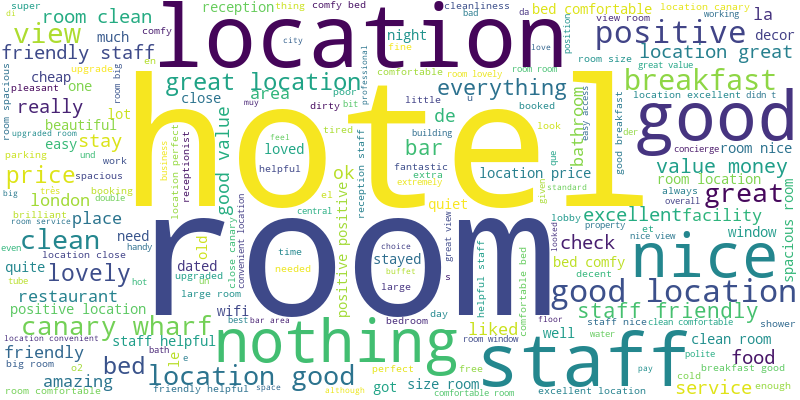

In [46]:
wc('positive')

Sample size: 18933


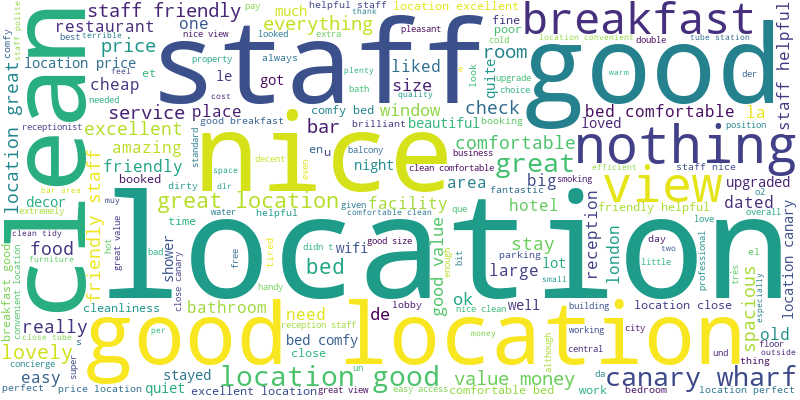

In [47]:
wc('positive', ignore = ['hotel', 'room', 'positive', 'negative'])

Sample size: 18933


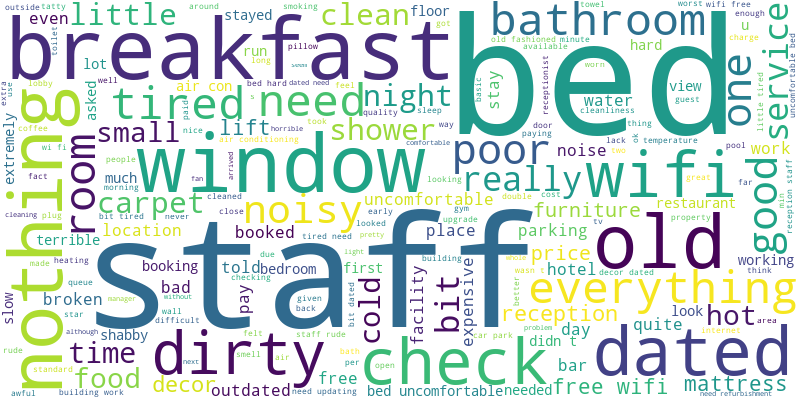

In [57]:
wc('negative', ignore = ['hotel', 'room', 'positive', 'negative'])

Sample size: 18933


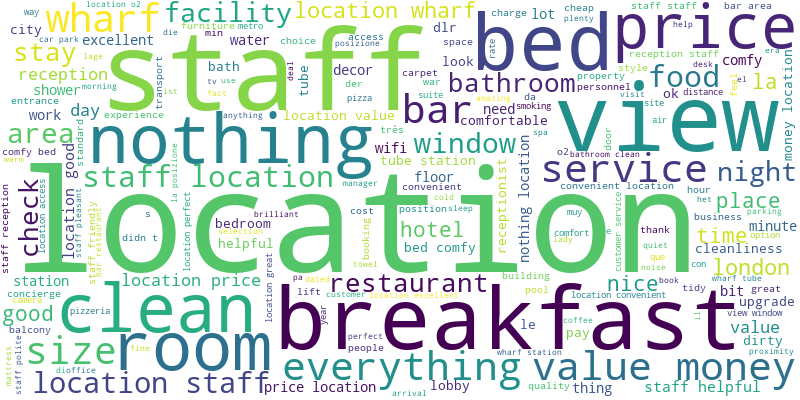

In [49]:
wc('positive', ignore = ['hotel', 'room', 'positive', 'negative'], pos = 'NOUN')

Sample size: 18933


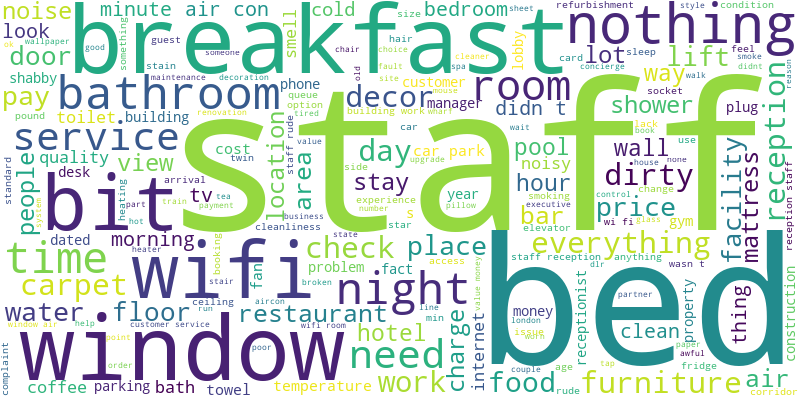

In [50]:
wc('negative', ignore = ['hotel', 'room', 'positive', 'negative'], pos = 'NOUN')

Sample size: 18933


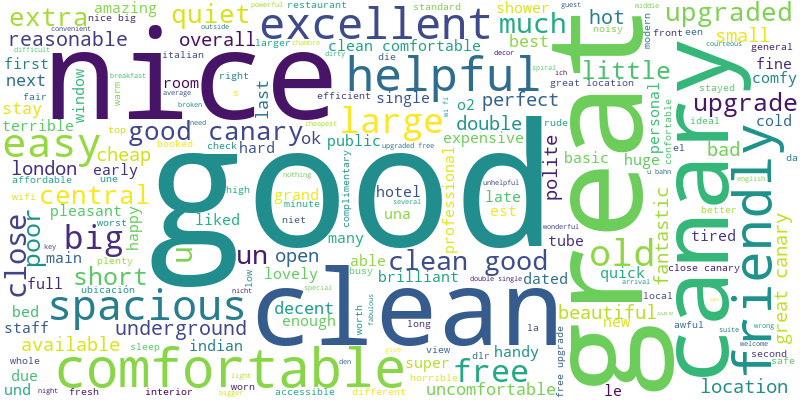

In [51]:
wc('positive', ignore = ['hotel', 'room', 'positive', 'negative'], pos = 'ADJ')

Sample size: 18933


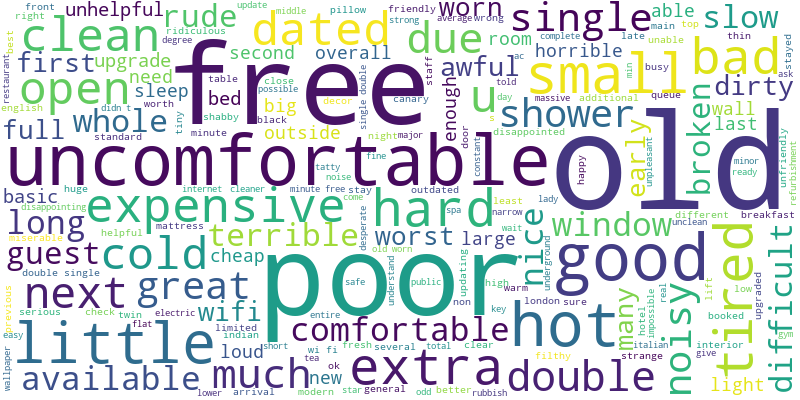

In [52]:
wc('negative', ignore = ['hotel', 'room', 'positive', 'negative'], pos = 'ADJ')

Sample size: 18933


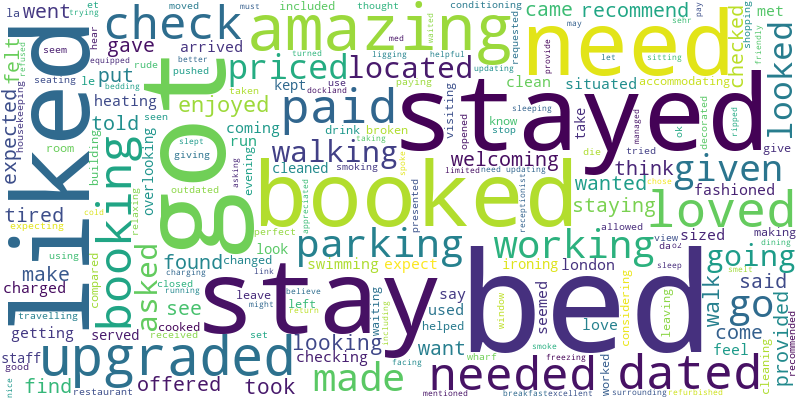

In [53]:
wc('positive', ignore = ['hotel', 'room', 'positive', 'negative'], pos = 'VERB')

Sample size: 18933


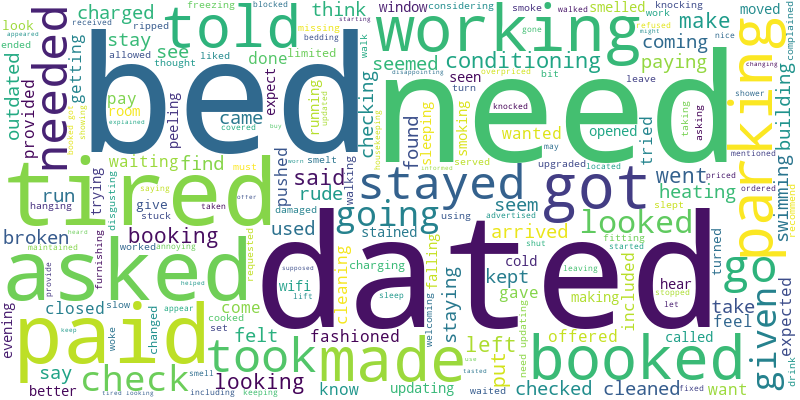

In [54]:
wc('negative', ignore = ['hotel', 'room', 'positive', 'negative'], pos = 'VERB')

Sample size: 18933


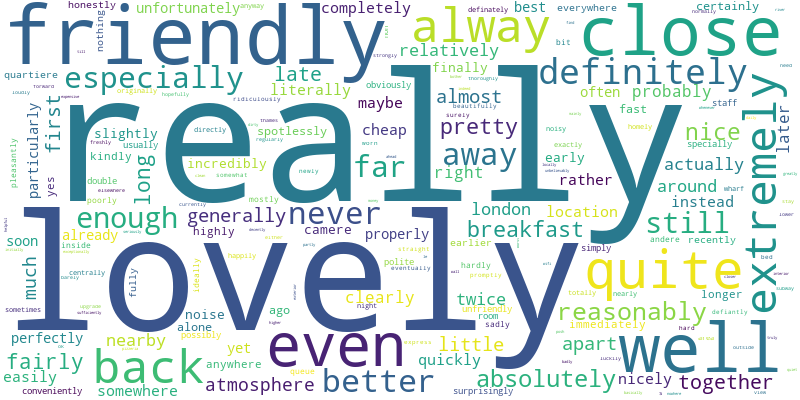

In [55]:
wc('positive', ignore = ['hotel', 'room', 'positive', 'negative'], pos = 'ADV')

Sample size: 18933


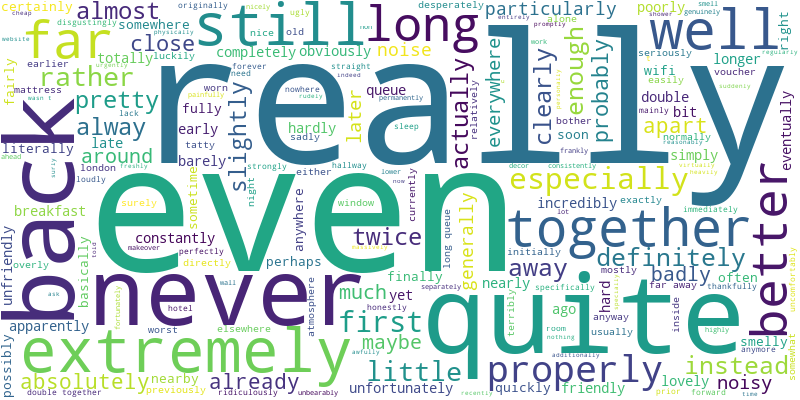

In [56]:
wc('negative', ignore = ['hotel', 'room', 'positive', 'negative'], pos = 'ADV')